In [1]:
import seml
import pandas as pd
import scanpy as sc
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from lataq.metrics.metrics import metrics
from lataq_reproduce.exp_dict import EXPERIMENT_INFO

plt.rcParams['figure.dpi'] = 300

/home/icb/carlo.dedonno/anaconda3/envs/lataq_cuda/lib/python3.8/site-packages/seml/database.py:5: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


# Get results for SCANVI, SCVI, MARS, SVM

In [2]:
results = {}

In [3]:
results = seml.get_results('lataq.hlca', to_data_frame=True)

  0%|          | 0/323 [00:00<?, ?it/s]

  0%|          | 0/323 [00:00<?, ?it/s]

/home/icb/carlo.dedonno/anaconda3/envs/lataq_cuda/lib/python3.8/site-packages/seml/evaluation.py:80: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  parsed = pd.io.json.json_normalize(parsed, sep='.')


In [4]:
for score in list(results['result.integration_scores'].loc[0].columns):
    results[f'result.{score}'] = results['result.integration_scores'].apply(
        lambda x: x[score]
    )
#results = results[[
#    'result.NMI_cluster/label',
#    'result.ARI_cluster/label',
#    'result.ASW_label',
#    'result.ASW_label/batch',
#    'result.PCR_batch',
#    'result.isolated_label_F1',
#    'result.isolated_label_silhouette',
#    'result.graph_conn',
#]]
#results = results.assign(method='lataq.hlca')

In [5]:
results['mean'] = results[results.columns[results.columns.str.contains('result')]].mean(axis=1)

In [6]:
results.sort_values(by='mean', ascending=False)

,_id,config.overwrite,config.db_collection,config.alpha_epoch_anneal,config.clustering_res,config.embedding_dim,config.eta,config.hidden_layers,config.inject_condition_info,config.latent_dim,...,result.integration_scores,result.NMI_cluster/label,result.ARI_cluster/label,result.ASW_label,result.ASW_label/batch,result.PCR_batch,result.isolated_label_F1,result.isolated_label_silhouette,result.graph_conn,mean
213,215,215,lataq.hlca,1000.0,2.0,20,100,4.0,both,50,...,NMI_cluster/label ARI_cluster/label ASW_l...,0.909637,0.859962,0.790165,0.672999,0.0,0.993553,0.670807,0.965363,0.732811
106,107,107,lataq.hlca,1000.0,2.0,10,100,4.0,both,50,...,NMI_cluster/label ARI_cluster/label ASW_l...,0.913338,0.867068,0.794608,0.637490,0.0,0.990085,0.684988,0.972506,0.732510
315,317,317,lataq.hlca,1000.0,2.0,30,100,3.0,both,50,...,NMI_cluster/label ARI_cluster/label ASW_l...,0.907774,0.851779,0.764712,0.665448,0.0,0.990199,0.712572,0.966473,0.732370
70,71,71,lataq.hlca,1000.0,2.0,10,100,4.0,both,25,...,NMI_cluster/label ARI_cluster/label ASW_l...,0.907488,0.858743,0.766795,0.670573,0.0,0.989182,0.669316,0.973749,0.729481
321,323,323,lataq.hlca,1000.0,2.0,30,100,4.0,both,50,...,NMI_cluster/label ARI_cluster/label ASW_l...,0.909479,0.873528,0.786906,0.653498,0.0,0.988332,0.660858,0.953669,0.728284
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7,8,8,lataq.hlca,1000000.0,2.0,10,1,3.0,decoder,10,...,NMI_cluster/label ARI_cluster/label ASW_l...,0.829875,0.713864,0.606864,0.654759,0.0,0.655219,0.519619,0.976165,0.619546
217,219,219,lataq.hlca,1000.0,2.0,30,10,2.0,decoder,10,...,NMI_cluster/label ARI_cluster/label ASW_l...,0.841280,0.721001,0.623646,0.640009,0.0,0.673216,0.465736,0.971556,0.617056
216,218,218,lataq.hlca,1000000.0,2.0,30,1,2.0,decoder,10,...,NMI_cluster/label ARI_cluster/label ASW_l...,0.820975,0.707906,0.599903,0.708041,0.0,0.659608,0.457373,0.977953,0.616470
222,224,224,lataq.hlca,1000000.0,2.0,30,1,3.0,decoder,10,...,NMI_cluster/label ARI_cluster/label ASW_l...,0.824210,0.696172,0.604582,0.655853,0.0,0.667929,0.505245,0.977634,0.616453


<AxesSubplot:xlabel='config.eta', ylabel='mean'>

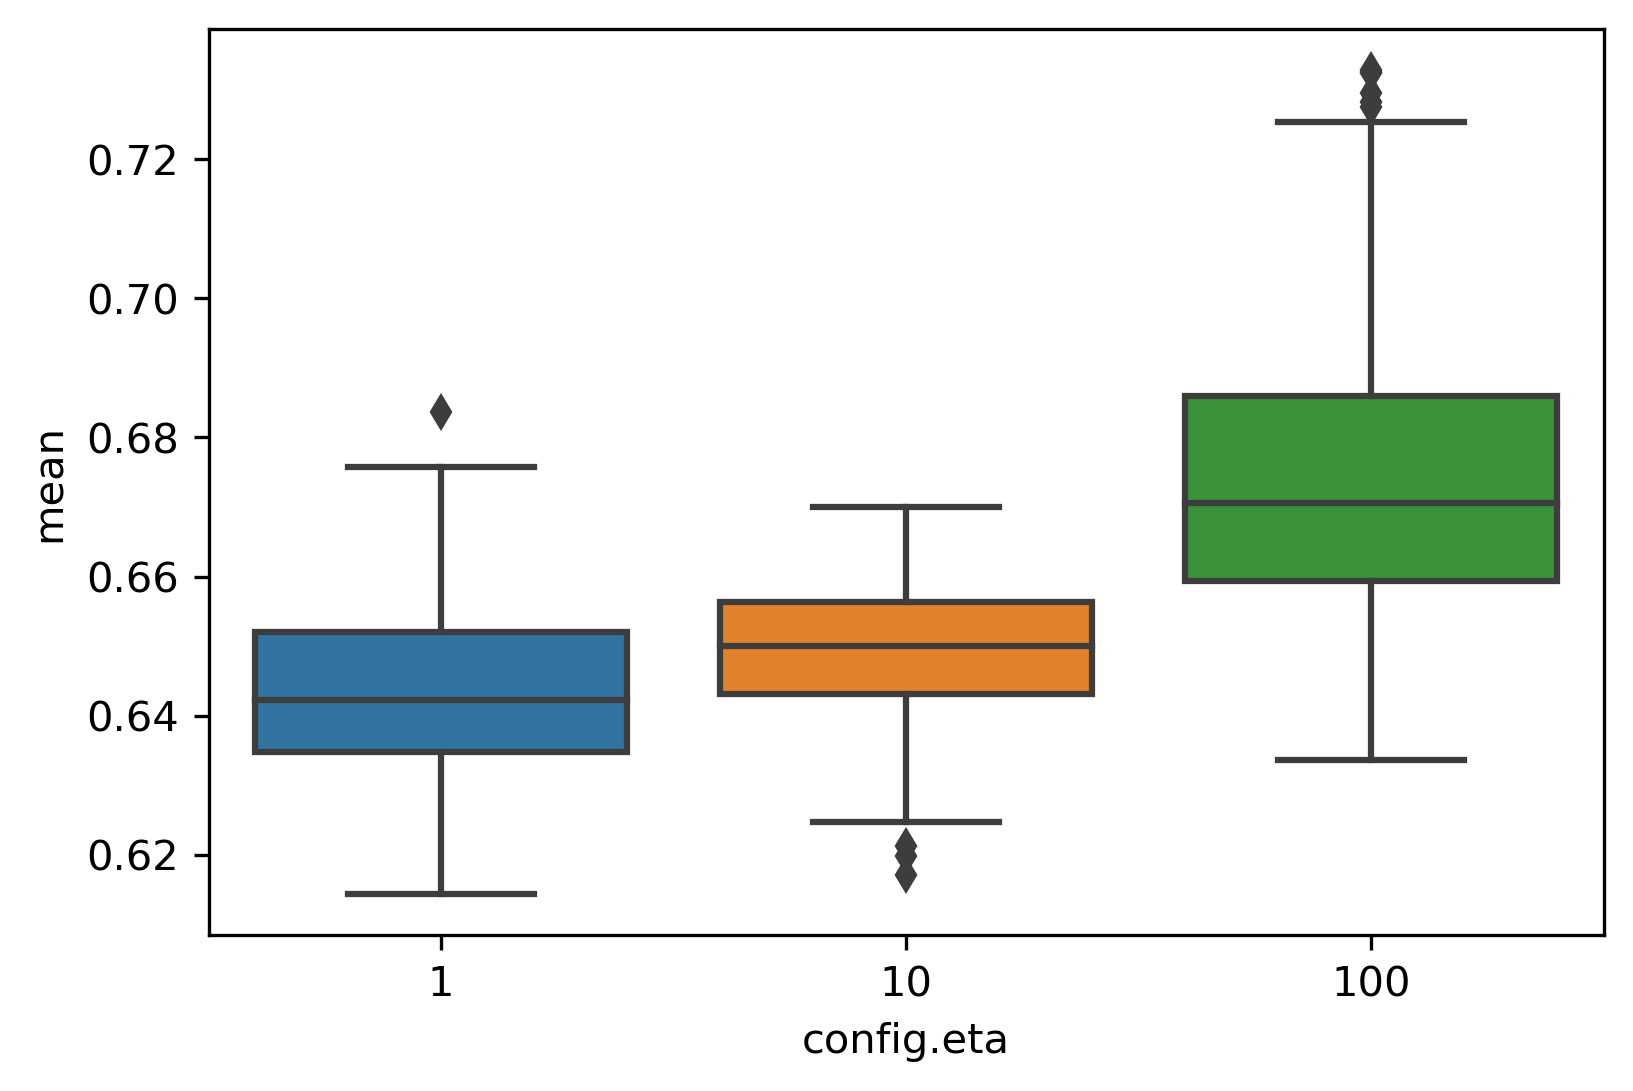

In [7]:
sns.boxplot(x='config.eta', y='mean', data=results)

<AxesSubplot:xlabel='config.alpha_epoch_anneal', ylabel='mean'>

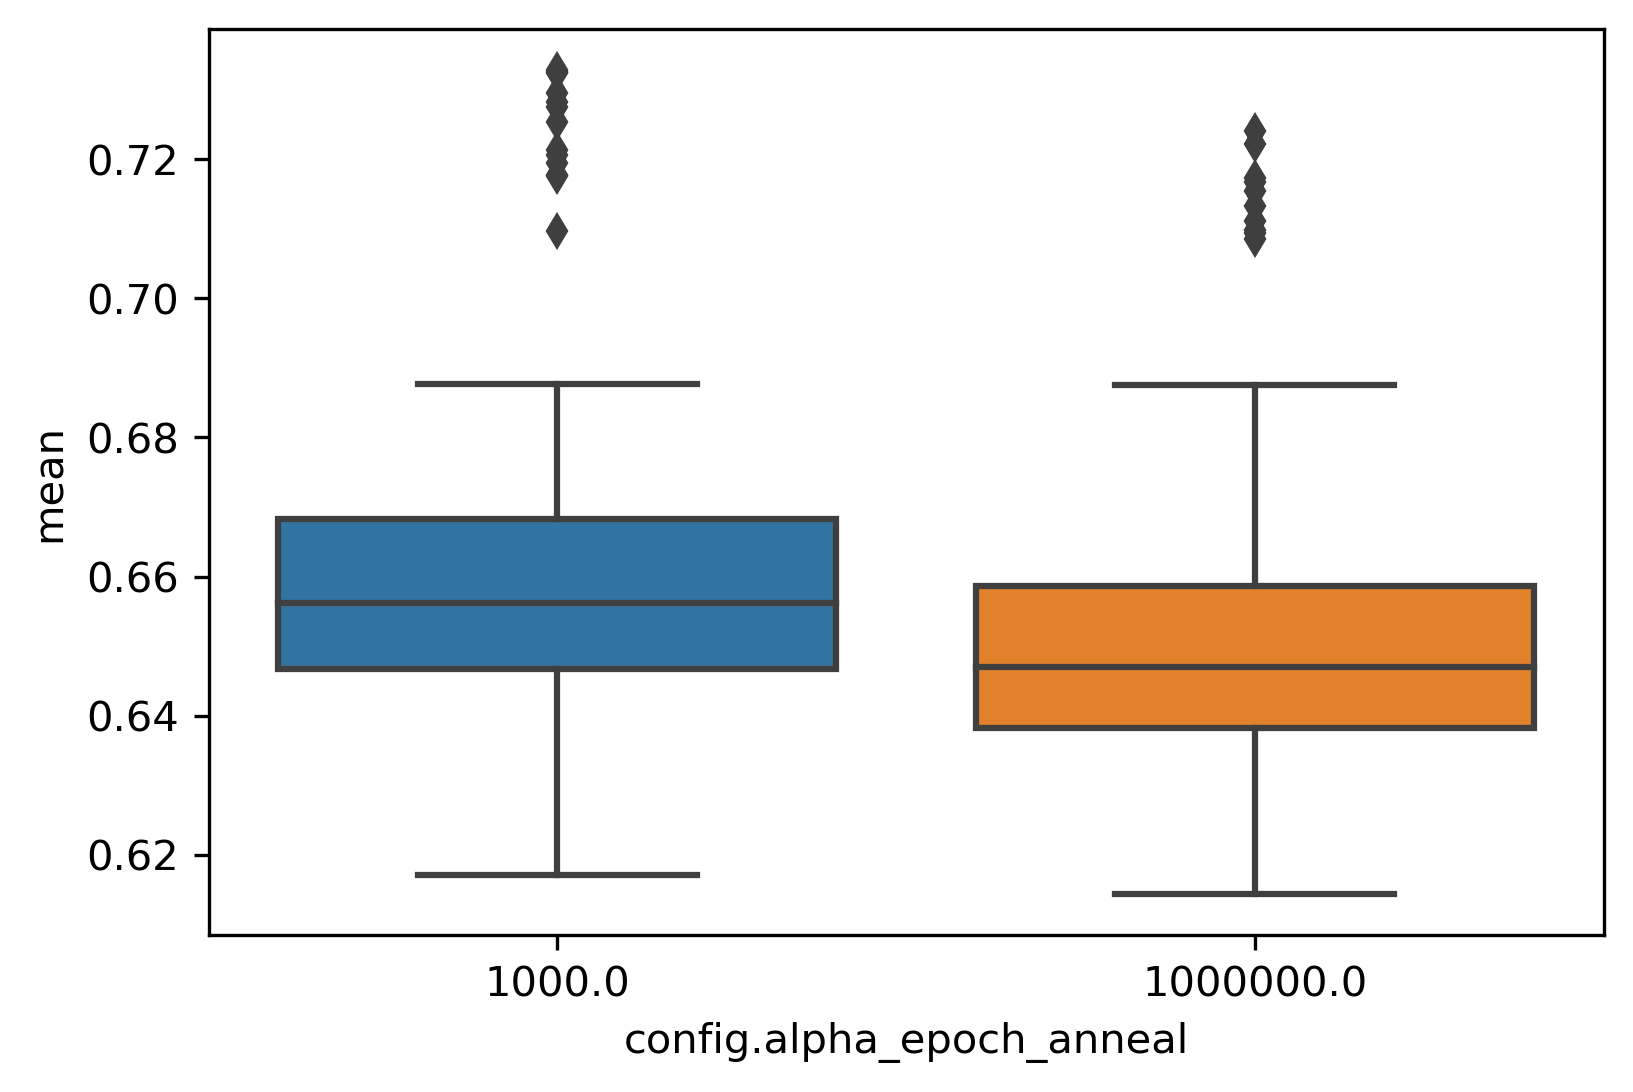

In [8]:
sns.boxplot(x='config.alpha_epoch_anneal', y='mean', data=results)

<AxesSubplot:xlabel='config.latent_dim', ylabel='mean'>

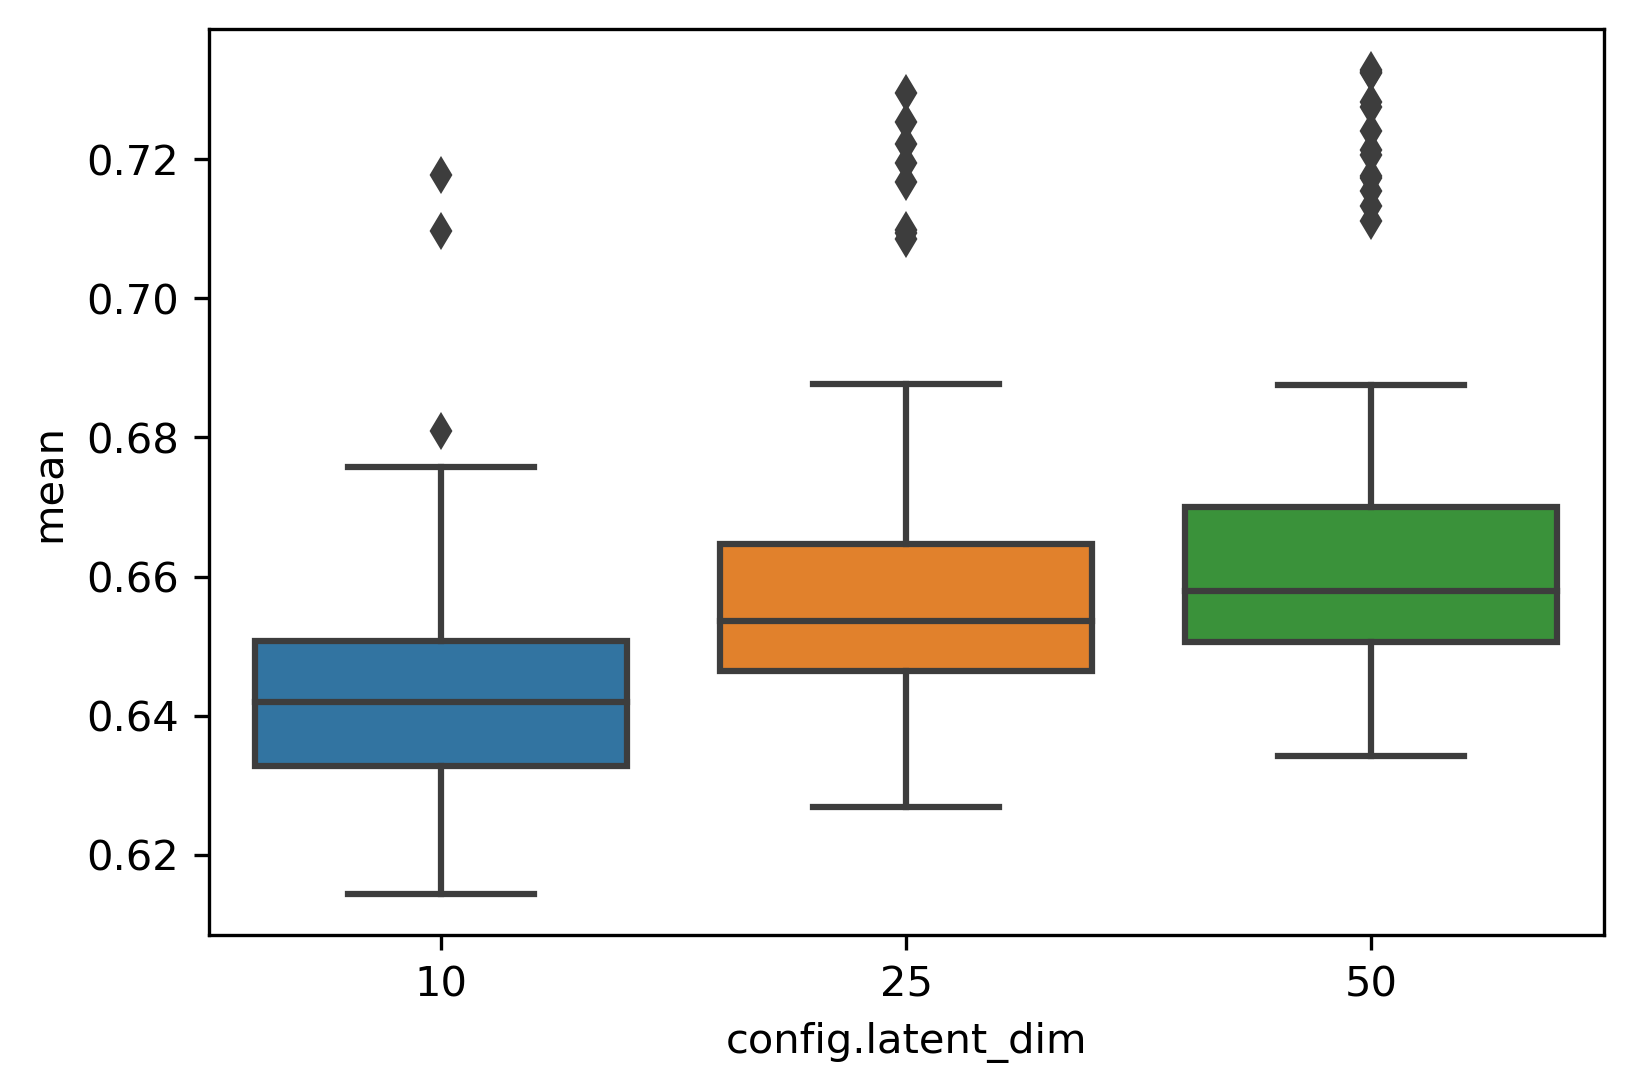

In [9]:
sns.boxplot(x='config.latent_dim', y='mean', data=results)

<AxesSubplot:xlabel='config.embedding_dim', ylabel='mean'>

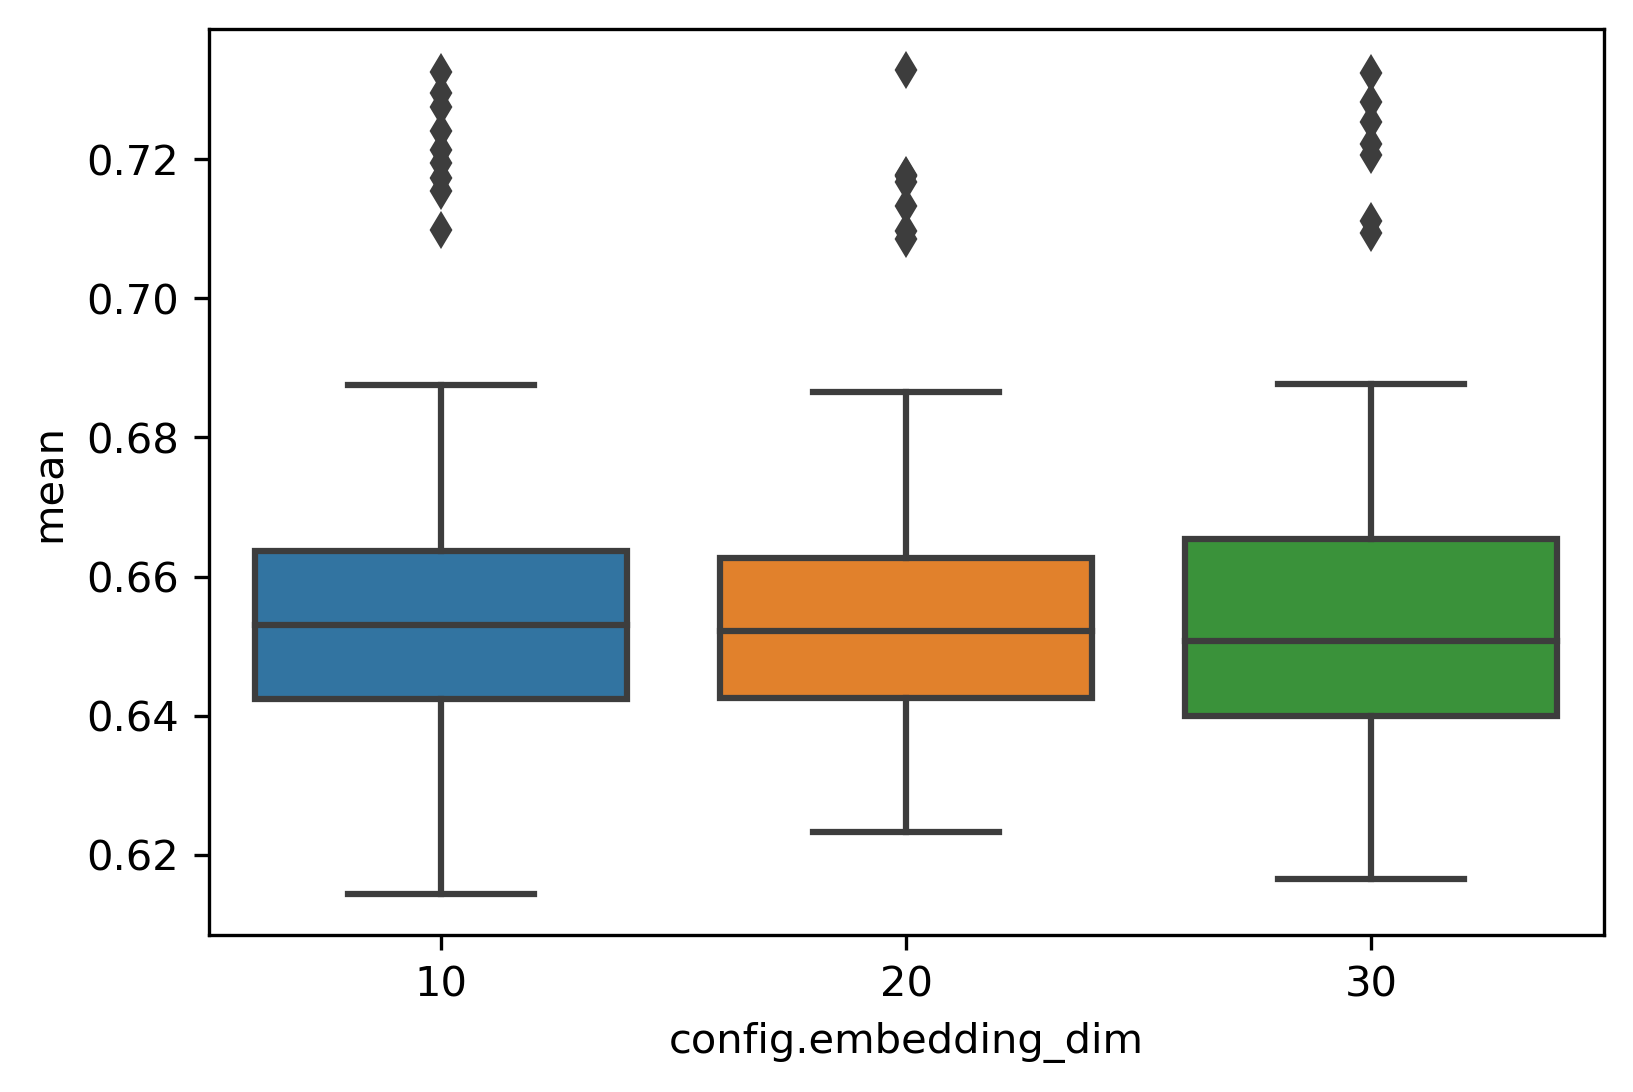

In [10]:
sns.boxplot(x='config.embedding_dim', y='mean', data=results)

<AxesSubplot:xlabel='config.hidden_layers', ylabel='mean'>

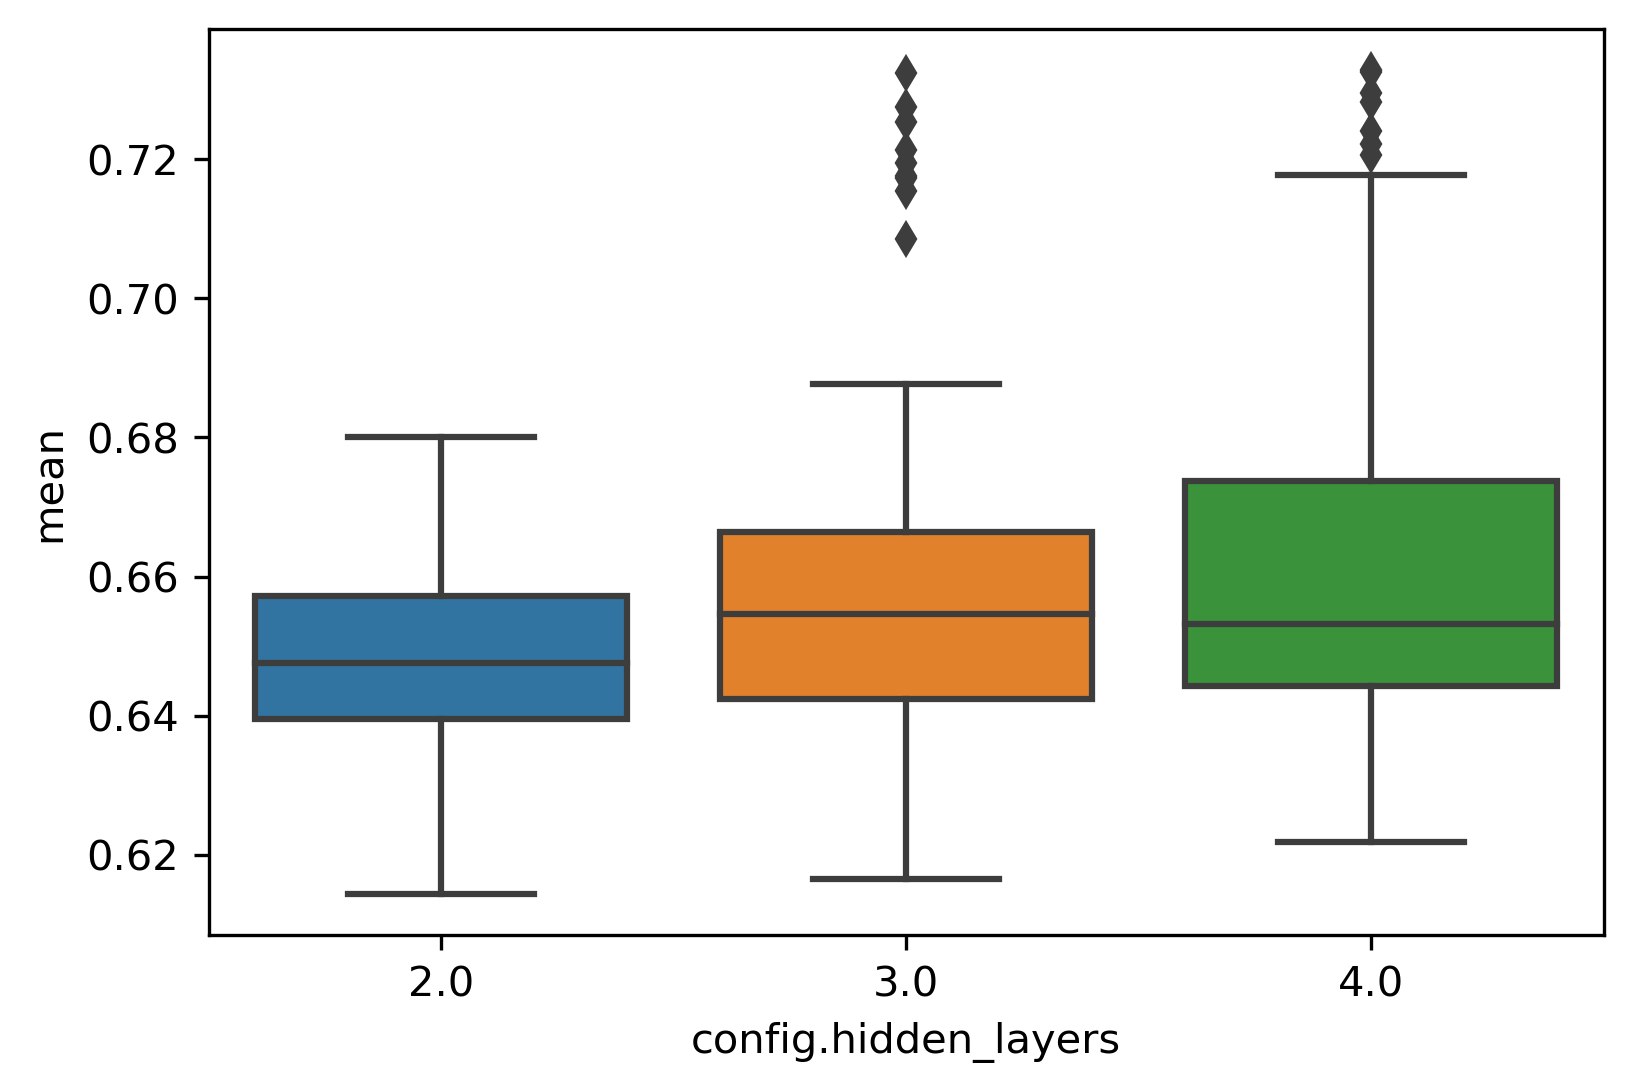

In [11]:
sns.boxplot(x='config.hidden_layers', y='mean', data=results)

In [12]:
results.columns

Index(['_id', 'config.overwrite', 'config.db_collection',
       'config.alpha_epoch_anneal', 'config.clustering_res',
       'config.embedding_dim', 'config.eta', 'config.hidden_layers',
       'config.inject_condition_info', 'config.latent_dim',
       'config.loss_metric', 'config.n_epochs', 'config.n_pre_epochs',
       'config.seed', 'result.integration_scores', 'result.NMI_cluster/label',
       'result.ARI_cluster/label', 'result.ASW_label',
       'result.ASW_label/batch', 'result.PCR_batch',
       'result.isolated_label_F1', 'result.isolated_label_silhouette',
       'result.graph_conn', 'mean'],
      dtype='object')

<AxesSubplot:xlabel='config.inject_condition_info', ylabel='mean'>

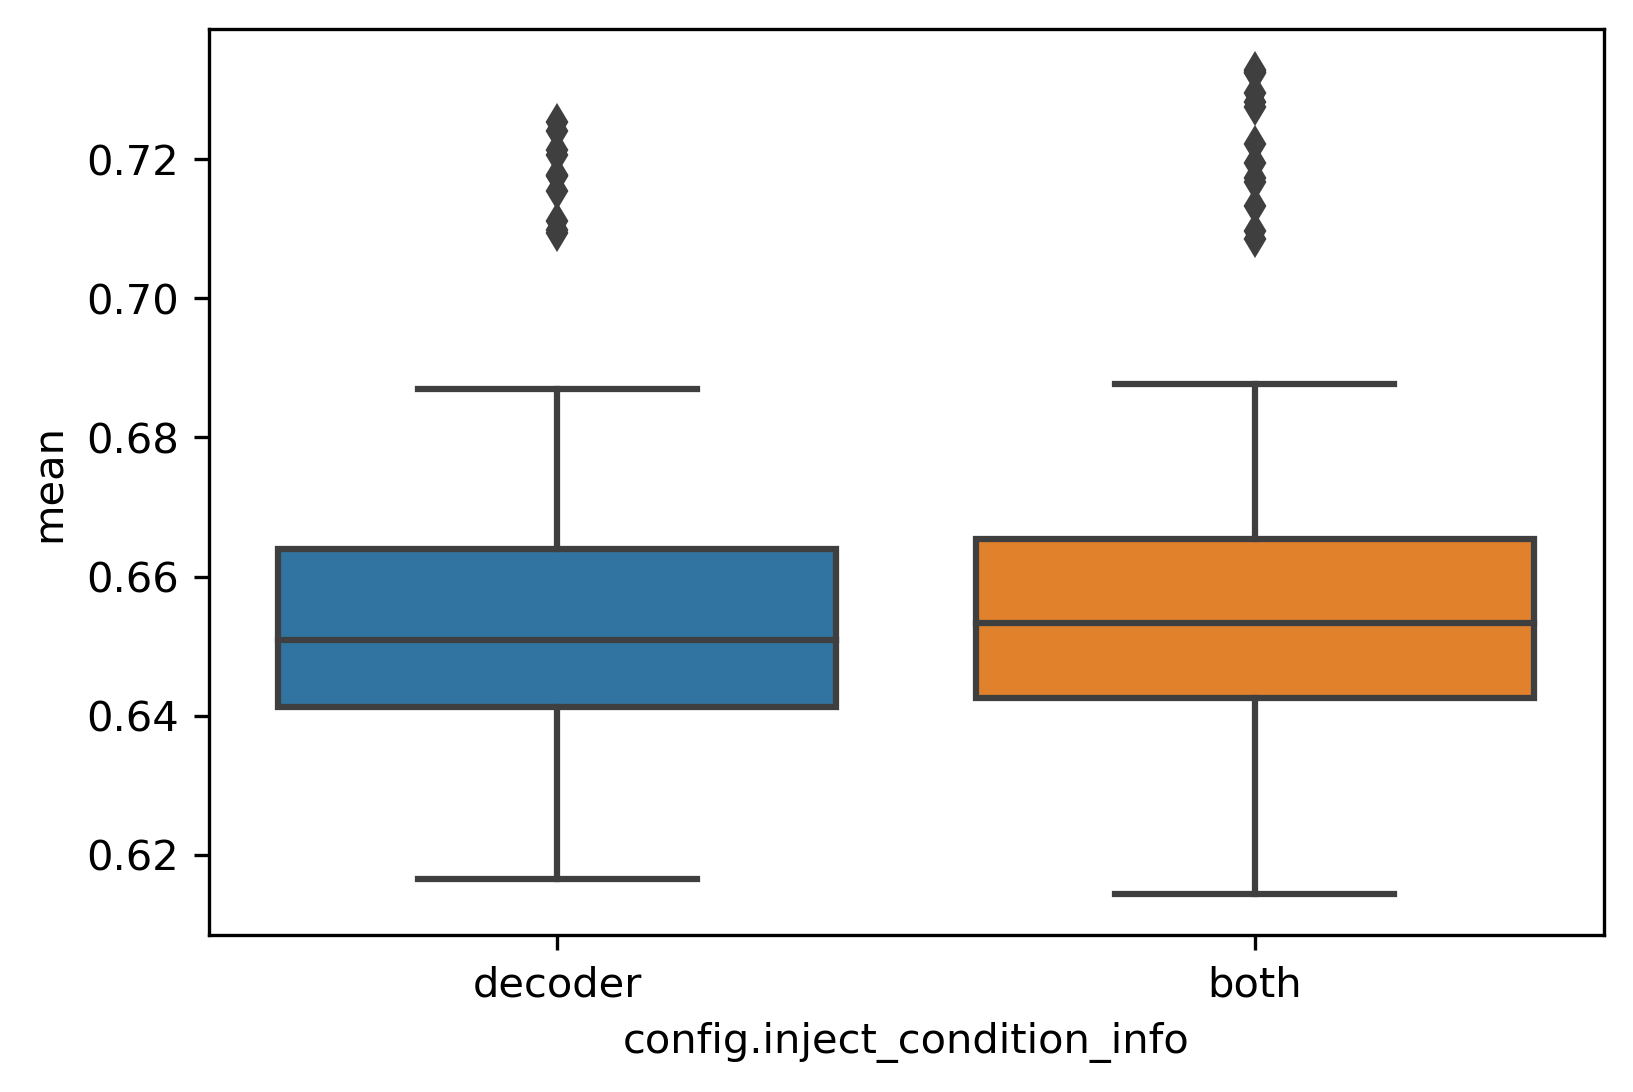

In [13]:
sns.boxplot(x='config.inject_condition_info', y='mean', data=results)

In [3]:
results_best = seml.get_results('lataq.hlca_best_model', to_data_frame=True)

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

/home/icb/carlo.dedonno/anaconda3/envs/lataq_cuda/lib/python3.8/site-packages/seml/evaluation.py:80: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  parsed = pd.io.json.json_normalize(parsed, sep='.')


In [4]:
for score in list(results_best['result.integration_scores'].loc[0].columns):
    results_best[f'result.{score}'] = results_best['result.integration_scores'].apply(
        lambda x: x[score]
    )
#results = results[[
#    'result.NMI_cluster/label',
#    'result.ARI_cluster/label',
#    'result.ASW_label',
#    'result.ASW_label/batch',
#    'result.PCR_batch',
#    'result.isolated_label_F1',
#    'result.isolated_label_silhouette',
#    'result.graph_conn',
#]]
#results = results.assign(method='lataq.hlca')

In [7]:
results_best['mean'] = results_best[results_best.columns[results_best.columns.str.contains('result')]].mean(axis=1)

In [8]:
results_best.sort_values(by='mean', ascending=False)

,_id,config.overwrite,config.db_collection,config.alpha_epoch_anneal,config.clustering_res,config.embedding_dim,config.eta,config.hidden_layers,config.inject_condition_info,config.latent_dim,...,result.integration_scores,result.NMI_cluster/label,result.ARI_cluster/label,result.ASW_label,result.ASW_label/batch,result.PCR_batch,result.isolated_label_F1,result.isolated_label_silhouette,result.graph_conn,mean
2,3,3,lataq.hlca_best_model,1000.0,2.0,20,100,4,both,50,...,NMI_cluster/label ARI_cluster/label ASW_l...,0.884296,0.821444,0.567268,0.817174,0.0,0.672940,0.719265,0.917549,0.674992
1,2,2,lataq.hlca_best_model,1000.0,2.0,20,10,4,both,50,...,NMI_cluster/label ARI_cluster/label ASW_l...,0.852293,0.771229,0.529121,0.843201,0.0,0.668191,0.593440,0.940378,0.649732
0,1,1,lataq.hlca_best_model,1000.0,2.0,20,1,4,both,50,...,NMI_cluster/label ARI_cluster/label ASW_l...,0.782562,0.586486,0.467378,0.868321,0.0,0.667443,0.624622,0.947524,0.618042
